# A. La régression lineaire

## I. Introduction
### II. Régression lineaire simple
Soit un ensemble de points $ \{ (x_{i},y_{i}) \in R^{2}  i=1...m \}$.
Trouver une fonction $h$ telle que $$h(x_{i}) \approx y_{i} \forall i \in \{1 ... m\}$$

# Q1. Ecrire un script qui permet d'obtenir le nuage de point suivant:
Remarque: On remaque qu'il y a une correlation entre x et y dans cette figure.

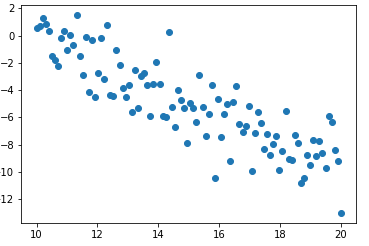

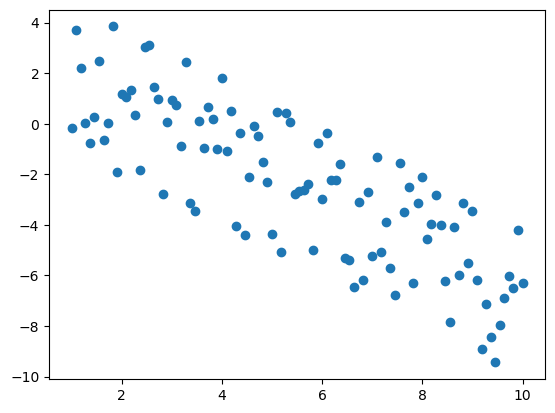

In [120]:
# Votre code ici
import numpy as np 
import matplotlib.pyplot as plt
from  numpy import random

x = np.linspace(1,10,100)
y = (-x + 3) + random.rand(x.shape[0])*6 -3
plt.scatter(x,y)


# Q2. la fonction hypothèse h(x)
Soit $h(x)=w_{0}+ w_{1}x$. Sur la meme figure, tracez h(x) pour differentes valeurs des coeficients  $w_{0}$ et $w_{1}$ et calculez la valeur de la fonction objective (coût) suivante:
$$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} $$
Il faut remarquer que $$\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = (\hat{Y}-Y).(\hat{Y}-Y)$$
avec
$\hat{Y}=(h(x_{1}),h(x_{2}),... h(x_{m}))$
et $Y=(y_{1},y_{2},...y_{m})$

Que remarquez-vous?


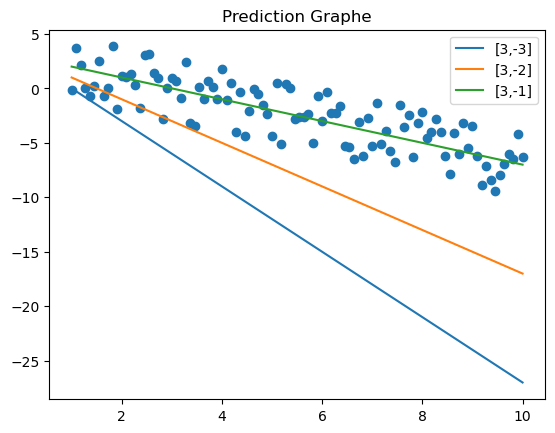

In [121]:
def h(x ,w):
    return w[0]+w[1]*x
def cout(x,y,w):
    return (1/x.shape[0]*2)* (h(x,w)-y).dot(h(x,w)-y)

plt.scatter(x,y)
plt.plot(x,h(x,[3,-3]) , label='[3,-3]')
plt.plot(x,h(x,[3,-2]) , label='[3,-2]')
plt.plot(x,h(x,[3,-1]) , label='[3,-1]')
plt.title("Prediction Graphe")
plt.legend()

In [122]:
print(" [3,-3] : ",cout(x,y,[3,-3]),"\n [3,-2] : ",cout(x,y,[3,-2]),"\n [3,-1] : ",cout(x,y ,[3,-1]))

 [3,-3] :  310.80620855632014 
 [3,-2] :  84.34174585303612 
 [3,-1] :  6.422737695206638


# Q3. Méthode de la descente du gradient 
Pour minimiser le coût $$ J(w_{0},w_{1})=\frac{1}{2m}\sum_{i=0}^{m}(h(x_{i})-y_{i})^{2} = \frac{1}{2m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})^{2} $$
On utilise la methode de la descente du gradient. Il faut donc calculer la dérivée de $J(w_{0},w_{1})$ par rapport à $w_{0}$ et par rapport à $w_{1}$ nous avons alors:
$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{0}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i}) $$

$$ \frac{\delta J(w_{0},w_{1})}{\delta w_{1}}=\frac{1}{m}\sum_{i=0}^{m}(w_{0}+ w_{1}x_{i}-y_{i})x_{i} $$
A chaque itération, la mise à jour des coeficients sera comme suivant:
$$ w_{0}\leftarrow w_{0}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{0}}$$
$$ w_{1}\leftarrow w_{1}- \alpha\frac{\delta J(w_{0},w_{1})}{\delta w_{1}}$$

$\alpha$: learning rate

a. Ecrire un script pour cet algorithme.

b. Tracer l'evolution de ${J(w_{0},w_{1})}$ au cours des itération de la descente du gradient pour differentes valeur de $\alpha$.

c. Que remarquez-vous

d. Visulisez la solution obtenue

la fonction cout :  6.354025406372091


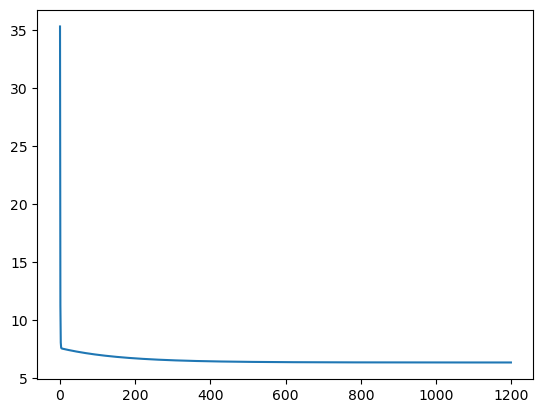

In [123]:
def h(x,w):
    return w[0]+w[1]*x

def GradDes(x , y , alpha, itera):
    J = []
    w = [1,1]
    for i in range(itera):
        w[1] = w[1] - alpha * (1/x.shape[0]) * np.sum((h(x,w)-y)*x)
        w[0] = w[0] - alpha * (1/x.shape[0]) * np.sum(h(x,w)-y)
        J.append(cout(x,y,w))
    return w , J

itera =  1200
alpha = 0.017
w,J = GradDes(x,y,alpha , itera)
plt.plot(np.arange(itera),J)
print("la fonction cout : ",J[-1])

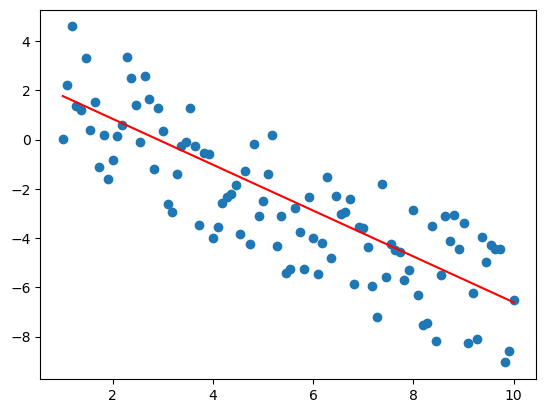

In [124]:
x = np.linspace(1,10,100)
y = (-x + 3) + random.rand(x.shape[0])*6 -3
plt.scatter(x,y)
Y = w[0] + w[1]*x
plt.plot(x,Y,color='r')

# Q4. Méthode des moindres carées
Dans le cas d'une régression lineaire simple nous avons la solution directe suivante:
$$ w_{1}=\frac{\sum_{i=0}^{m}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=0}^{m}(x_{i}-\overline{x})^2} $$

$$w_{0}=\overline{y}-w_{1}\overline{x}$$

Où $\overline{x}$ est la moyenne des éléments de x

a. Ecrire un script qui calcule les valeur de $w_{0}$ et $w_{1}$

b. Visualiser les resultats

In [125]:
def moidre_Caree(x,y):
    w = [1,1]
    w[1] = ((x - x.mean()).dot(y -y.mean()) )  /  ((x-x.mean()).dot(x-x.mean())) 
    w[0] = y.mean() - w[1]*x.mean()
    return w

w = moidre_Caree(x,y)
w

[2.294039843795468, -0.9138188222094532]

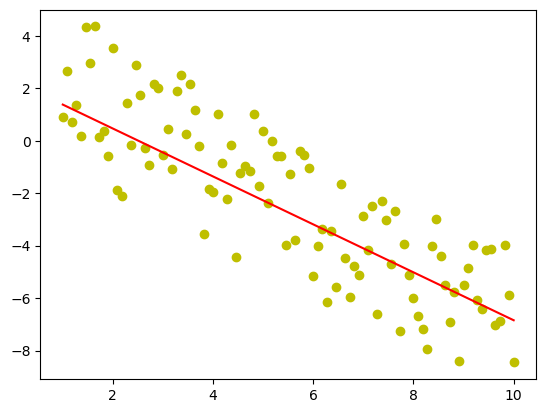

In [126]:
x = np.linspace(1,10,100)
y = (-x + 3) + random.rand(x.shape[0])*6 -3
plt.scatter(x,y, color='y')
Y = w[0] + w[1]*x
plt.plot(x,Y,color='r')

In [127]:
print("la fonction cout :", cout(x,y,w))

la fonction cout : 6.075570367636852


Une autre solution sous la forme matricielle:
$$w = (X^{T}X)^{-1}X^{T}Y $$
avec

$w=[w_{1},w_{2}]$

$X=[[1,x_{1}],[1,x_{2}],...,[1,x_{m}]]$

$Y=[y_{1}, y_{2},...,y_{m}]$

Ecrire un script pour cette solution, et coparer le resultat avec les méthodes precedentes.

In [128]:
x = np.linspace(1,10,100)
y = (-x + 3) + random.rand(x.shape[0])*6 -3

# pour obtenir une matrice et ne pas un scalaire on doit ajouter les 1
ones = np.ones(100)
X = np.stack(( ones , x ),axis=1)
X

array([[ 1.        ,  1.        ],
       [ 1.        ,  1.09090909],
       [ 1.        ,  1.18181818],
       [ 1.        ,  1.27272727],
       [ 1.        ,  1.36363636],
       [ 1.        ,  1.45454545],
       [ 1.        ,  1.54545455],
       [ 1.        ,  1.63636364],
       [ 1.        ,  1.72727273],
       [ 1.        ,  1.81818182],
       [ 1.        ,  1.90909091],
       [ 1.        ,  2.        ],
       [ 1.        ,  2.09090909],
       [ 1.        ,  2.18181818],
       [ 1.        ,  2.27272727],
       [ 1.        ,  2.36363636],
       [ 1.        ,  2.45454545],
       [ 1.        ,  2.54545455],
       [ 1.        ,  2.63636364],
       [ 1.        ,  2.72727273],
       [ 1.        ,  2.81818182],
       [ 1.        ,  2.90909091],
       [ 1.        ,  3.        ],
       [ 1.        ,  3.09090909],
       [ 1.        ,  3.18181818],
       [ 1.        ,  3.27272727],
       [ 1.        ,  3.36363636],
       [ 1.        ,  3.45454545],
       [ 1.        ,

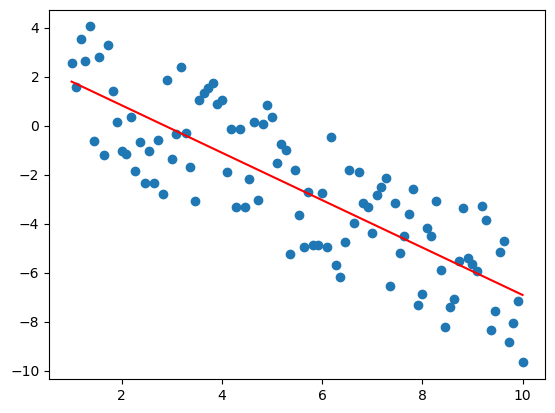

In [129]:
from scipy import linalg

w = linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

plt.scatter(x,y)
Y = w[0] + w[1]*x
plt.plot(x,Y,color='r')

In [130]:
print("la fonction cout :", cout(x,y,w))

la fonction cout : 6.138383487801512


# II. Régression lineaire multiple
Dans ce cas $x=(x_{1},...,x_{n})\in \Re^{n}$ et $y \in \Re$ la fonction hypothèse $h(x)=w_{0}+w_{1}x_{1}+...+w_{n}x_{n}$

#### Refaire les mêmes étapes pour n=2

In [131]:
# def h(x1 , x2 ,w):
#     return w[0]+w[1]*x1+w[2]*x2
# def cout(x1,x2,y,w):
#     return (1/x1.shape[0]*2)* (h(x1,x2,w)-y).dot(h(x1,x2,w)-y)

x1 = np.linspace(1,10,10)
x2 =np.linspace(1,10,10)
x = np.stack((x1,x2),axis=1)
y = random.rand(10)

# w = linalg.inv((x1*x2).T.dot((x1*x2))).dot((x1*x2).T).dot(y)
# w
x.T[0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [132]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [133]:
model = LinearRegression()
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state=42)

In [134]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

-0.07760507743388789

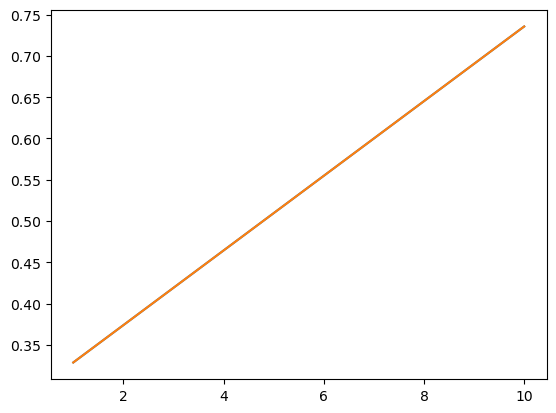

In [135]:
w = np.array([model.intercept_ ,model.coef_[0] ,model.coef_[1]])
Y = w[0] + w[1]*x.T[0] + w[2]*x.T[1]
plt.plot(x,Y)

# III. Application
## Q1: Analyse des données
Télécharger le dataset **House price prediction** depuis le lien https://www.kaggle.com/datasets/shree1992/housedata


In [136]:
import pandas as pd

In [137]:
## Chargement du dataset dans le dataframe "df"
df= pd.read_csv("data.csv")
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [138]:
## Afficher les information sur ce dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [139]:
## Afficher une description de ce dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [140]:
## Réccupérer les colonnes "x: price" et "y: sqft_lot" dans le dataframe "data"
data= df.loc[:,["price","sqft_lot"]]
data

,price,sqft_lot
0,3.130000e+05,7912
1,2.384000e+06,9050
2,3.420000e+05,11947
3,4.200000e+05,8030
4,5.500000e+05,10500
...,...,...
4595,3.081667e+05,6360
4596,5.343333e+05,7573
4597,4.169042e+05,7014
4598,2.034000e+05,6630


In [141]:
## Supprimer les les ligne vide de "data"
data.dropna(inplace=True)
data

,price,sqft_lot
0,3.130000e+05,7912
1,2.384000e+06,9050
2,3.420000e+05,11947
3,4.200000e+05,8030
4,5.500000e+05,10500
...,...,...
4595,3.081667e+05,6360
4596,5.343333e+05,7573
4597,4.169042e+05,7014
4598,2.034000e+05,6630


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


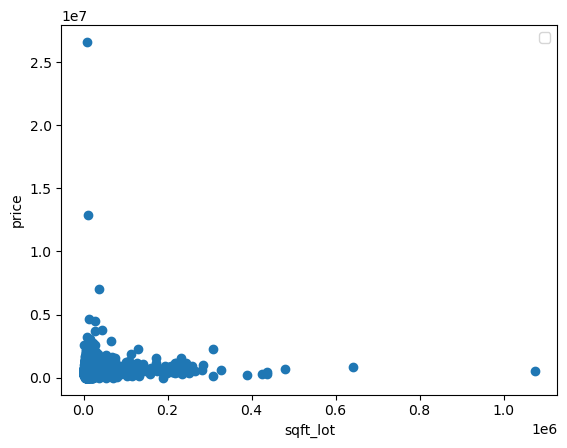

In [142]:
## Afficher un scatter plot pour ces donnée
plt.scatter(data.loc[:,"sqft_lot"],data.loc[:,"price"])
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.legend()

In [143]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [144]:
## a partir du dataset "data" générer deux sous-dataset 
## "x_train" et "y_train" 80% des données
## "x_test"  et "y_test"  20%
x_train , x_test ,y_train ,y_test = train_test_split( data.loc[:,"sqft_lot"] , data.loc[:,"price"] , test_size=0.20 , random_state=42 )
y_train.shape



(3680,)

## 2. La descente du gradiant
Appliquer l'algorithme de la descente du gradient sur "x_train" "y_train"

<class 'function'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


print(np.min(x_train), np.max(x_train), np.min(y_train), np.max(y_train))
638 1074218 0.0 7062500.0
(3680,)


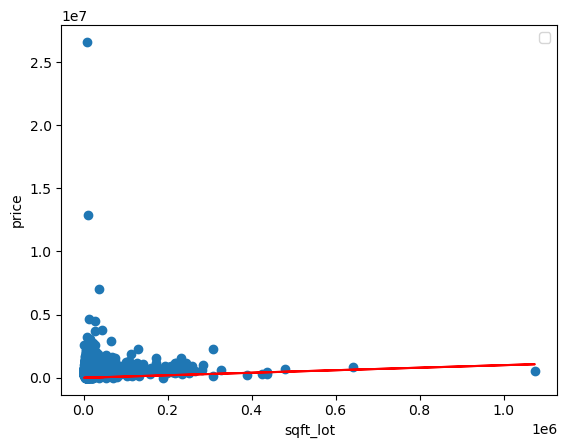

In [164]:
alpha = 0.0017
itera =100
print(type(h))

x_train_normalized = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
y_train_normalized = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))


w1 , J = GradDes( x_train_normalized , y_train_normalized , alpha , itera)

# print("Type de w:", type(w1))
# print("Valeur de w:", w1)
print("print(np.min(x_train), np.max(x_train), np.min(y_train), np.max(y_train))")
print(np.min(x_train), np.max(x_train), np.min(y_train), np.max(y_train))

# plt.scatter(x_train , y_train)
plt.scatter(data.loc[:,"sqft_lot"] , data.loc[:,"price"])
plt.xlabel("sqft_lot")
plt.ylabel("price")
Y2 = w1[0] +w1[1]*x_train
plt.plot( x_train , Y2 , color='r')
plt.legend()
print(x_train.shape)

## 3. Les moindres carées
Appliquer l'algorithme de la descente du gradient sur "x_train" "y_train"

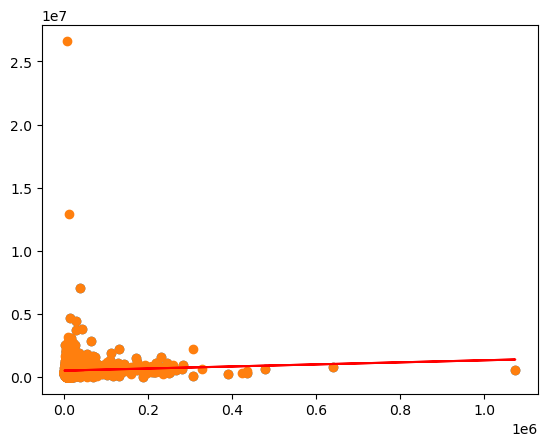

In [149]:
w = moidre_Caree(x_train,y_train)
Y2 = w[0] +w[1]*x_train
plt.scatter(x_train, y_train)
plt.scatter(data.loc[:,"sqft_lot"] , data.loc[:,"price"])
plt.plot(x_train, Y2 ,color='r')

# IV. La régréssion linèaire avec scikit-learn
La régression est déjà implémentée dans le package scikit-learn. On peut l'utiliser directement de la manière suivante :

In [165]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Il faut que le X soit une Matrice
X=[[1],[2],[3],[4],[5]]
y=[2,4,6,8,10]
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.predict([[14]])

array([28.])

Apliquer cette méthode pour sur le dataset du "House price prediction"

In [166]:
data2 = df.loc[:,["bedrooms","sqft_living","floors" ,"view" , "bathrooms","price"]]
data2.corr()

,bedrooms,sqft_living,floors,view,bathrooms,price
bedrooms,1.000000,0.594884,0.177895,0.111028,0.545920,0.200336
sqft_living,0.594884,1.000000,0.344850,0.311009,0.761154,0.430410
floors,0.177895,0.344850,1.000000,0.031211,0.486428,0.151461
view,0.111028,0.311009,0.031211,1.000000,0.211960,0.228504
bathrooms,0.545920,0.761154,0.486428,0.211960,1.000000,0.327110
price,0.200336,0.430410,0.151461,0.228504,0.327110,1.000000


In [167]:
x = data2.loc[:,["bedrooms","sqft_living","floors","view","bathrooms"]]
y = data2.loc[:,"price"]

In [168]:
print(y.shape)
x.shape

(4600,)


(4600, 5)

In [169]:
model = LinearRegression()
x_train , x_test ,y_train ,y_test = train_test_split( x , y , test_size=0.20 , random_state=42 )
model.fit(x_train,y_train)
model.score(x_test , y_test )

0.029357071117370293

In [170]:
predict  =  [ [3.0,1340,1.5,0, 1.50]]
model.predict(predict)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330686.78990783])